# Autoregressive (AR) model

Autoregressive (AR) model is a fundamental model in time series forecasting, where the future value of a variable is assumed to depend linearly on its own previous values. In simpler terms, AR models predict future data points based on past data points.

## Key Concepts of AR Model:

1. **Autoregression:**

The term "autoregression" means "regression on itself." It uses the past values of a time series to predict its future values.

2. **AR Equation:**

In an AR model, the forecasted value is a linear combination of its previous values plus some noise (random error).
The formula for an AR model of order 
𝑝
p (denoted as AR(p)) is:
$$y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t$$

Where:

- yt is the current value of the time series.
- yt−1,yt−2, ...  yt−p  are previous values (lags).
- ϕ1, ϕ1, ... ϕp are coefficients that represent how much influence past values have on the current value.
- ϵt is a random error term (white noise).

3. **Order of the Model(p):**

The order of the AR model, denoted as AR(p), tells you how many previous time periods the model uses to make predictions. For example:

- **AR(1)**: Uses just the value from one previous time period.
- **AR(2)**: Uses values from the last two time periods, and so on.

4. **Stationarity:**

AR models work best when the time series is stationary, meaning the data’s statistical properties (like mean and variance) remain constant over time. Non-stationary data can be made stationary by differencing.


### When to Use AR Models

- When your data has a strong autocorrelation (the values are dependent on their past values).
- When your data exhibits a consistent pattern that can be explained by past values.

### AR vs MA Models

- **AR (Autoregressive)** models use past values to make predictions.
- **MA (Moving Average)** models use past errors to make predictions.

In practice, AR models are often combined with MA models to form **ARMA** or **ARIMA** models, which are widely used for forecasting time series data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

np.random.seed(42)

n = 200 
time = np.arange(n)

trend = 0.5 * time 
noise = np.random.normal(loc=0, scale=5, size=n)

actual_data = trend + noise

time_series = pd.Series(actual_data)

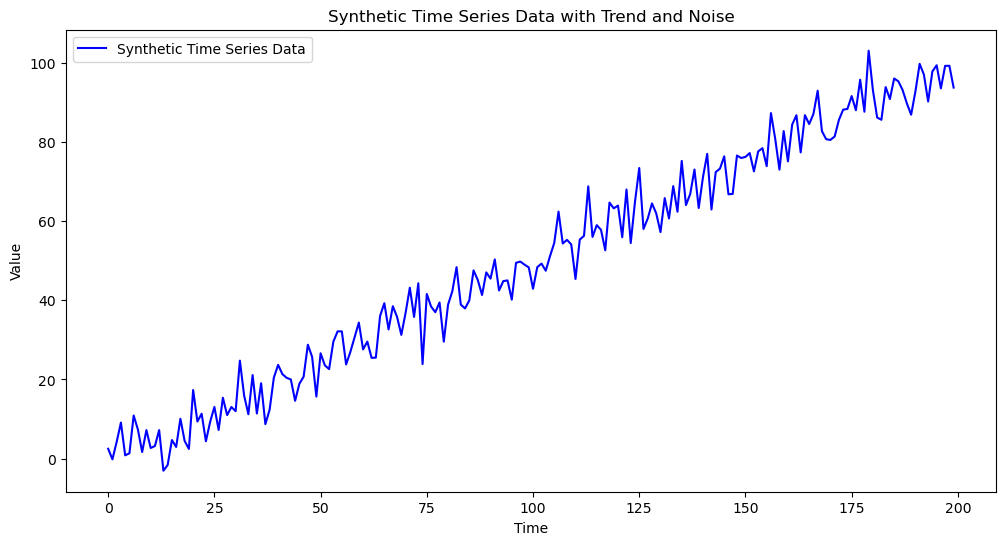

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Synthetic Time Series Data', color='blue')
plt.title('Synthetic Time Series Data with Trend and Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [3]:
ar1_model = AutoReg(time_series, lags=1)
ar1_model_fit = ar1_model.fit()

ar2_model = AutoReg(time_series, lags=2)
ar2_model_fit = ar2_model.fit()

ar1_predictions = ar1_model_fit.predict(start=0, end=n-1)
ar2_predictions = ar2_model_fit.predict(start=0, end=n-1)


In [4]:
df = pd.DataFrame({
    'Time': time,
    'Actual': time_series,
    'AR(1) Predictions': ar1_predictions,
    'AR(2) Predictions': ar2_predictions
})

df.head(10)

,Time,Actual,AR(1) Predictions,AR(2) Predictions
0,0,2.483571,NaN,NaN
1,1,-0.191322,4.201313,NaN
2,2,4.238443,1.598315,2.581303
3,3,9.115149,5.909019,3.408125
4,4,0.829233,10.654653,7.991433
5,5,1.329315,2.591440,6.381745
6,6,10.896064,3.078081,2.498496
7,7,7.337174,12.387701,7.410511
8,8,1.652628,8.924464,10.440812
9,9,7.212800,3.392704,5.897514


In [5]:
 df['Actual'] - df['AR(1) Predictions']

0           NaN
1     -4.392635
2      2.640128
3      3.206130
4     -9.825419
         ...   
195    2.406561
196   -4.958049
197    6.418617
198    0.905998
199   -4.621713
Length: 200, dtype: float64

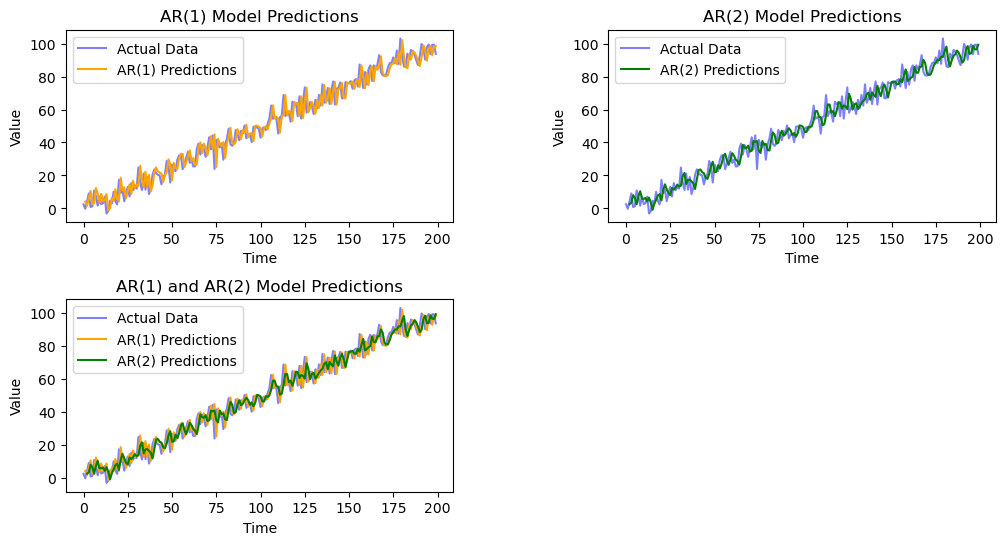

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.plot(time_series, label='Actual Data', color='blue', alpha=0.5)
plt.plot(ar1_predictions, label='AR(1) Predictions', color='orange')
plt.title('AR(1) Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


plt.subplot(2,2,2)
plt.plot(time_series, label='Actual Data', color='blue', alpha=0.5)
plt.plot(ar2_predictions, label='AR(2) Predictions', color='green')
plt.title('AR(2) Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(2,2,3)
plt.plot(time_series, label='Actual Data', color='blue', alpha=0.5)
plt.plot(ar1_predictions, label='AR(1) Predictions', color='orange')
plt.plot(ar2_predictions, label='AR(2) Predictions', color='green')
plt.title('AR(1) and AR(2) Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplots_adjust(hspace=0.4, wspace=0.4) 

plt.show()

### How to calculate ϕ1, ϕ1, ... ϕp
1. Using Ordinary Least Squares (OLS)
2. Using Maximum Likelihood Estimation (MLE)

In this notebook we will be seeing **OLS method**

## Example of Calculating the Ordinary Least Squares (OLS) Estimate for an AR(1) Model

### Scenario:
Imagine you have 5 data points:

$$
y = [5, 7, 6, 9, 8]
$$

For an AR(1) model, we assume that today’s value ($y_t$) is influenced by the previous day’s value ($y_{t-1}$):

$$
y_t = \phi_1 y_{t-1} + \text{error}
$$

We want to estimate $\phi_1$, which is the coefficient that tells us how much influence yesterday’s value has on today’s value.

### Steps to Calculate OLS Coefficient by Hand:

1. **Prepare the Data:**
   You have $y_t$ values for 5 time periods:

   - $y_1 = 5$ 
   - $y_2 = 7$ 
   - $y_3 = 6$ 
   - $y_4 = 9$ 
   - $y_5 = 8$

   To estimate $\phi_1$, we need to look at the relationship between today’s value ($y_t$) and yesterday’s value ($y_{t-1}$).

   The current values ($y_t$) for OLS:

   $$
   y = [7, 6, 9, 8]
   $$

   The lagged values ($y_{t-1}$):

   $$
   y_{t-1} = [5, 7, 6, 9]
   $$

2. **Set Up the OLS Equation:**
   The OLS formula for estimating $\phi_1$ in a linear regression is:

   $$
   \phi_1 = \frac{\sum(y_{t-1} \cdot y_t) - n \cdot \bar{y}_{t-1} \cdot \bar{y}_t}{\sum(y_{t-1}^2) - n \cdot \bar{y}_{t-1}^2}
   $$

   Where:

   - $y_t$ are the current values.
   - $y_{t-1}$ are the lagged values.
   - $\bar{y}_t$ is the mean of the current values.
   - $\bar{y}_{t-1}$ is the mean of the lagged values.
   - $n$ is the number of data points.

   Let’s calculate each component step by step.

3. **Calculate the Means:**
   First, compute the means of both the current values and the lagged values:

   $$
   \bar{y}_t = \frac{7 + 6 + 9 + 8}{4} = 7.5
   $$

   $$
   \bar{y}_{t-1} = \frac{5 + 7 + 6 + 9}{4} = 6.75
   $$

4. **Compute the Necessary Summations:**
   - $\sum(y_{t-1} \cdot y_t)$:

   $$
   (5 \cdot 7) + (7 \cdot 6) + (6 \cdot 9) + (9 \cdot 8) = 35 + 42 + 54 + 72 = 203
   $$

   - $\sum(y_{t-1}^2)$:

   $$
   5^2 + 7^2 + 6^2 + 9^2 = 25 + 49 + 36 + 81 = 191
   $$

5. **Plug Values into the OLS Formula:**
   Now, let’s substitute these values into the OLS formula:

   $$
   \phi_1 = \frac{203 - 4 \cdot (6.75 \cdot 7.5)}{191 - 4 \cdot (6.75^2)}
   $$

   **Simplifying step by step:**

   - Calculate the product of means:

   $$
   6.75 \cdot 7.5 = 50.625
   $$

   - Calculate the numerator:

   $$
   203 - 4 \cdot 50.625 = 203 - 202.5 = 0.5
   $$

   - Calculate the square of the lagged mean:

   $$
   6.75^2 = 45.5625
   $$

   - Calculate the denominator:

   $$
   191 - 4 \cdot 45.5625 = 191 - 182.25 = 8.75
   $$

6. **Final Calculation:**
   Now that we have the numerator and denominator:

   $$
   \phi_1 = \frac{0.5}{8.75} \approx 0.057
   $$


#### OLS Method

In [7]:
import numpy as np

y_t = np.array([7, 6, 9, 8])  
y_t_minus_1 = np.array([5, 7, 6, 9])

mean_y_t = np.mean(y_t)
mean_y_t_minus_1 = np.mean(y_t_minus_1)

sum_y_t_minus_1_y_t = np.sum(y_t_minus_1 * y_t)  
sum_y_t_minus_1_sq = np.sum(y_t_minus_1 ** 2)  

n = len(y_t)

numerator = sum_y_t_minus_1_y_t - n * mean_y_t_minus_1 * mean_y_t
denominator = sum_y_t_minus_1_sq - n * (mean_y_t_minus_1 ** 2)

phi_1 = numerator / denominator

print(f"The OLS estimate for ϕ1 is: {phi_1:.3f}")


The OLS estimate for ϕ1 is: 0.057


**Conclusion:**
The OLS estimate for ϕ1 is 0.057, meaning that each previous day’s value has a small influence (about 5.7%) on today’s value in this specific example.

**Key Takeaways:**
OLS is a method for estimating the coefficient(s) in a model by minimizing the sum of squared errors between actual and predicted values.
The formula involves computing means and sums of products between the current and lagged values.

***NOTE*: I haven't checked the accuracy of any AR model using any metrics. The main purpose of this notebook was to explain what AR is and how to calculate it.**